In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Анализ временных рядов следует стандартному плану:

1. Выявление тренда

## Тренд — это основная тенденция изменения величины со временем.

Если повезёт, тренд будет линейным и предсказать его будет проще.

Справа на графике с измерениями пульса тренд нелинейный, и здесь можно выделить:

+ участок старта, когда пульс растёт до более стабильного значения;
+ более-менее линейный участок основной дистанции;
+ участок финиша, когда пульс быстро и нелинейно идёт вверх.

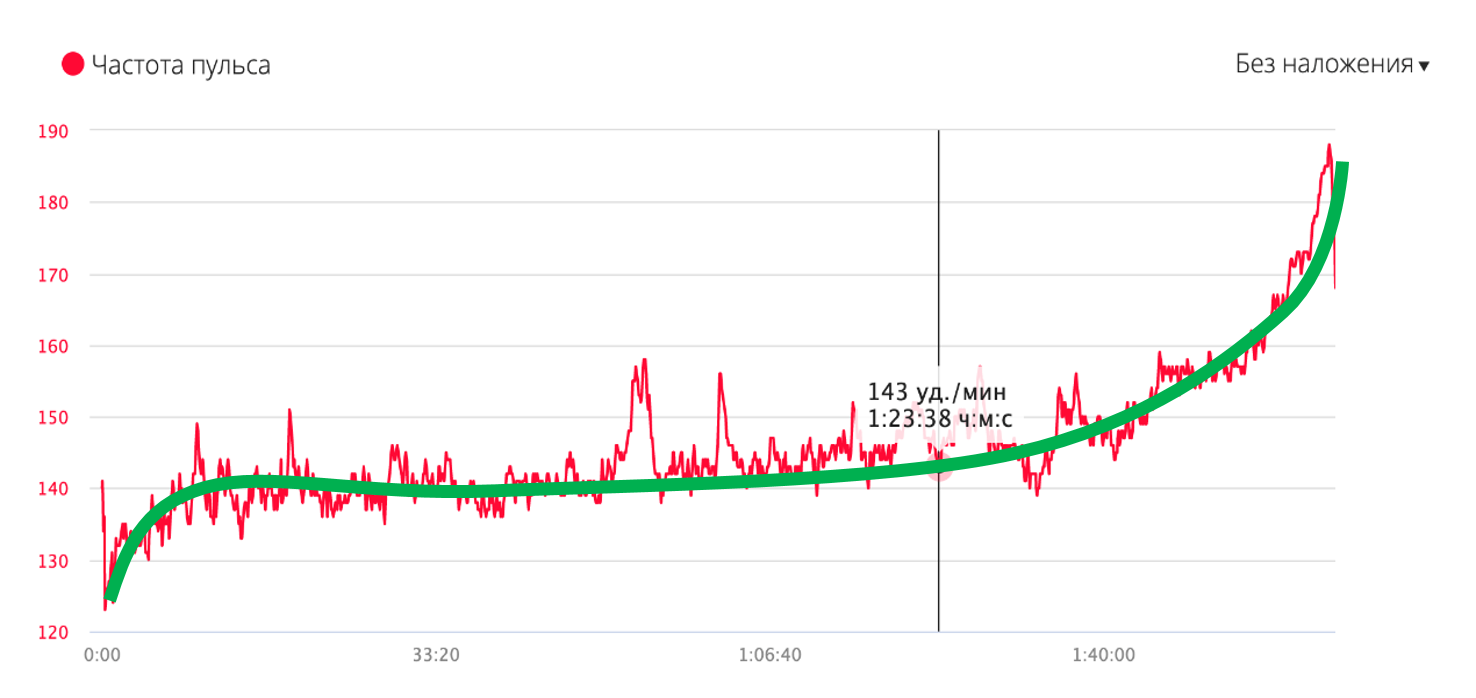

**Большое преимущество тренда** — его можно прогнозировать как функцию времени, не учитывая предыдущие значения временного ряда.


2. Анализ сезонности и цикличности

**Сезонность** задаёт периодические колебания ряда вокруг тренда. Сезонность есть не всегда, но очень часто.

Например, продажи автомобилей каждый год немного растут в декабре и падают в январе следующего года.

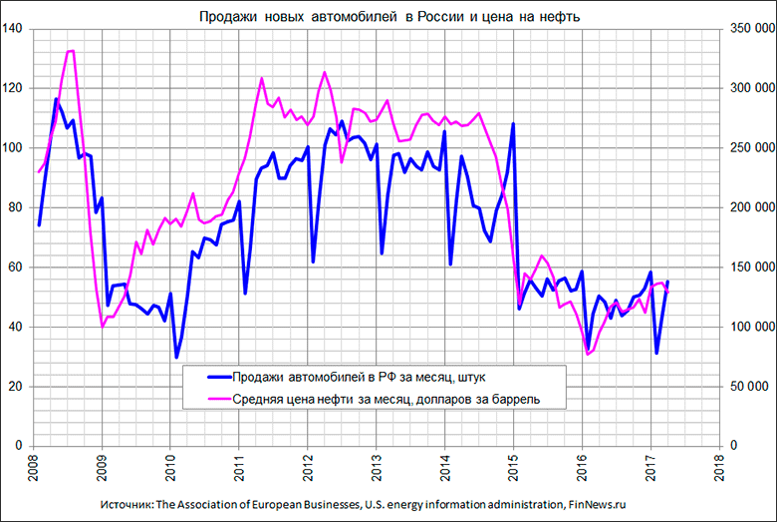

Затем необходимо оценить цикличность.

## **Цикличность** — это колебания временного ряда относительно тренда.

Отличием цикличности от сезонности является то, что сезонность возникает из периода в период (каждый декабрь, каждые выходные и т. д.), а цикличность проявляется на более длительных дистанциях и может слегка меняться от цикла к циклу.

На графике ниже показан цикл изменения объёма валового национального продукта в зависимости от времени. Такая цикличность скорее зависит не от сезона/квартала, а от внешних факторов.

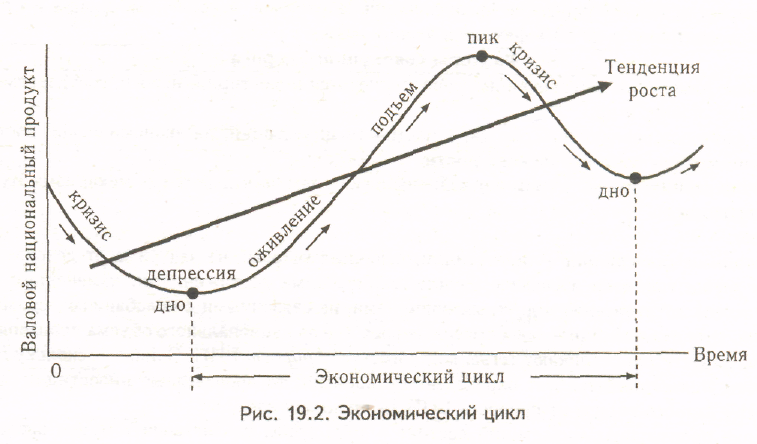

3. Проверка на шум

## **Белый шум** — это значения, которые являются независимыми друг от друга и одинаково распределены в районе нуля на протяжении всего временного интервала.

Как только мы получили белый шум в остатке ряда, дальше прогнозировать бессмысленно.

Обратите внимание на схему ниже и сравните все компоненты. Нерегулярность отвечает за шум.

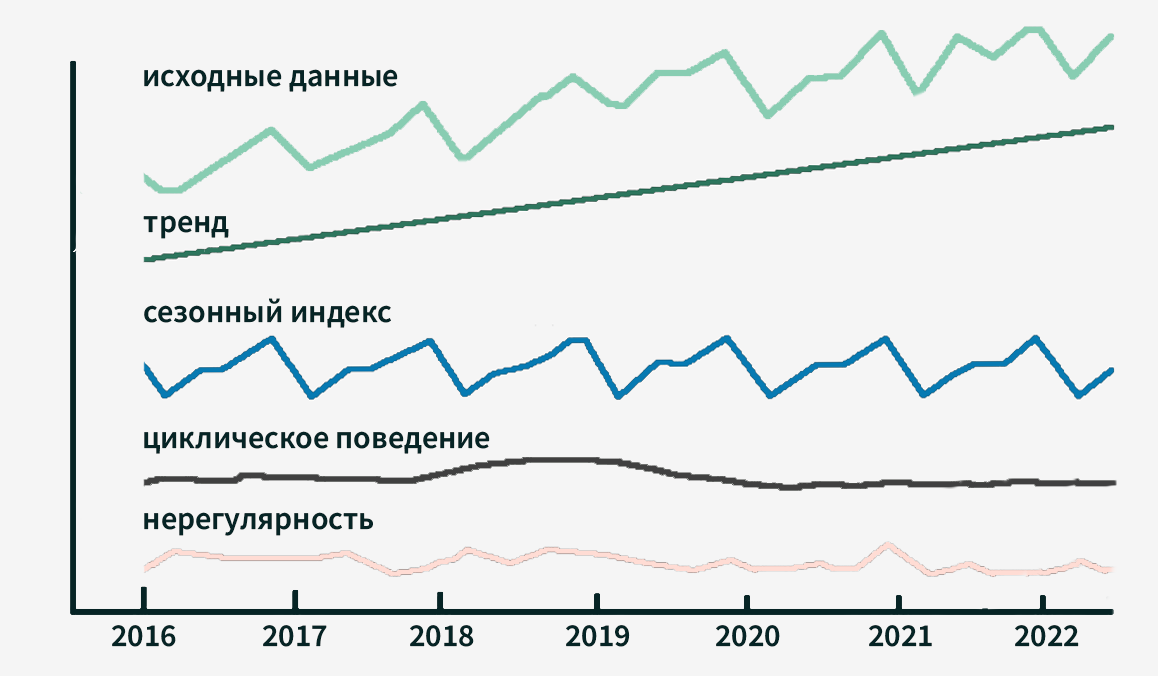

Самый простой вариант предсказания данных для временного ряда:

+ Выявили линейный тренд — остался белый шум.

Более сложный вариант:

+ Убрали тренд — осталась сезонность.
+ Убрали сезонность — остался белый шум.

Самый сложный вариант:

+ Убрали тренд и сезонность — остался всё ещё не белый шум.

  + Что делать в таком случае?

*Зависит от задачи: возможно, для магазина достаточно учесть нестандартное поведение в праздничные дни, а для средств в банкомате — еженедельную инкассацию.*

## Давайте сведём основную информацию в небольшую таблицу:

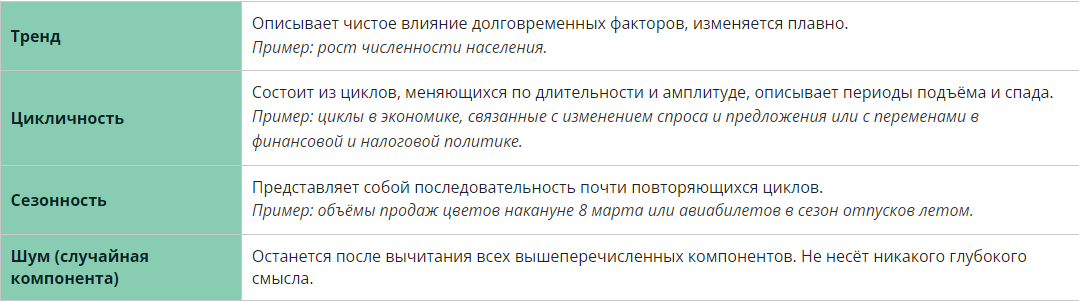

# ИНСТРУМЕНТЫ ДЛЯ ДЕКОМПОЗИЦИИ ВРЕМЕННОГО РЯДА

Разделить ряд на компоненты в Python можно с помощью библиотеки statsmodels. Если вы не устанавливали её ранее, это можно сделать стандартным способом (pip install statsmodels) или следуя рекомендациям в официальной документации.

В этом датасете представлены данные о количестве авиапассажиров в 1949-1960 годах. Рассмотрим некоторый временной ряд df из данного датасета.

In [3]:
df = pd.read_csv("AirPassengers.csv", index_col='Month', parse_dates=['Month'])

Теперь рассмотрим код, в котором демонстрируется, как применять декомпозицию к временному ряду df.

Декомпозиция выполняется методом seasonal_decompose(), который принимает на вход временной ряд с одним признаком. Индексом ряда должна быть дата или время. Именно поэтому, считывая датасет, мы указываем индексом столбец month и приводим его к формату даты. Также, если вы знаете, что в вашем временном ряду присутствует период, его вы также можете передать в качестве параметра в seasonal_decompose(). Более подробно о необязательных параметрах можно узнать в документации.

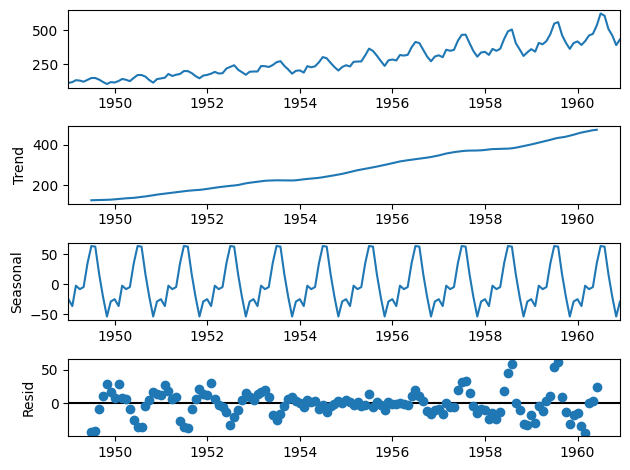

In [8]:
#импортируем библиотеку 
from statsmodels.tsa.seasonal import seasonal_decompose
#производим декомпозицию временного ряда 
decomposition = seasonal_decompose(df)
fig = decomposition.plot()
plt.show()

Как можно увидеть, по исходному ряду был получен тренд, выявлена некоторая сезонность и шум.

Отрабатывать навыки определения тренда, сезонности и шума и делать дальнейший анализ мы будем в итоговой практике, а пока давайте выполним несколько заданий и двинемся дальше ↓

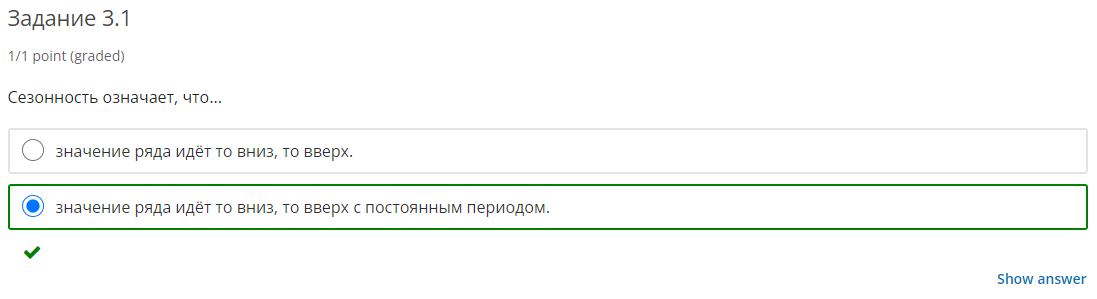

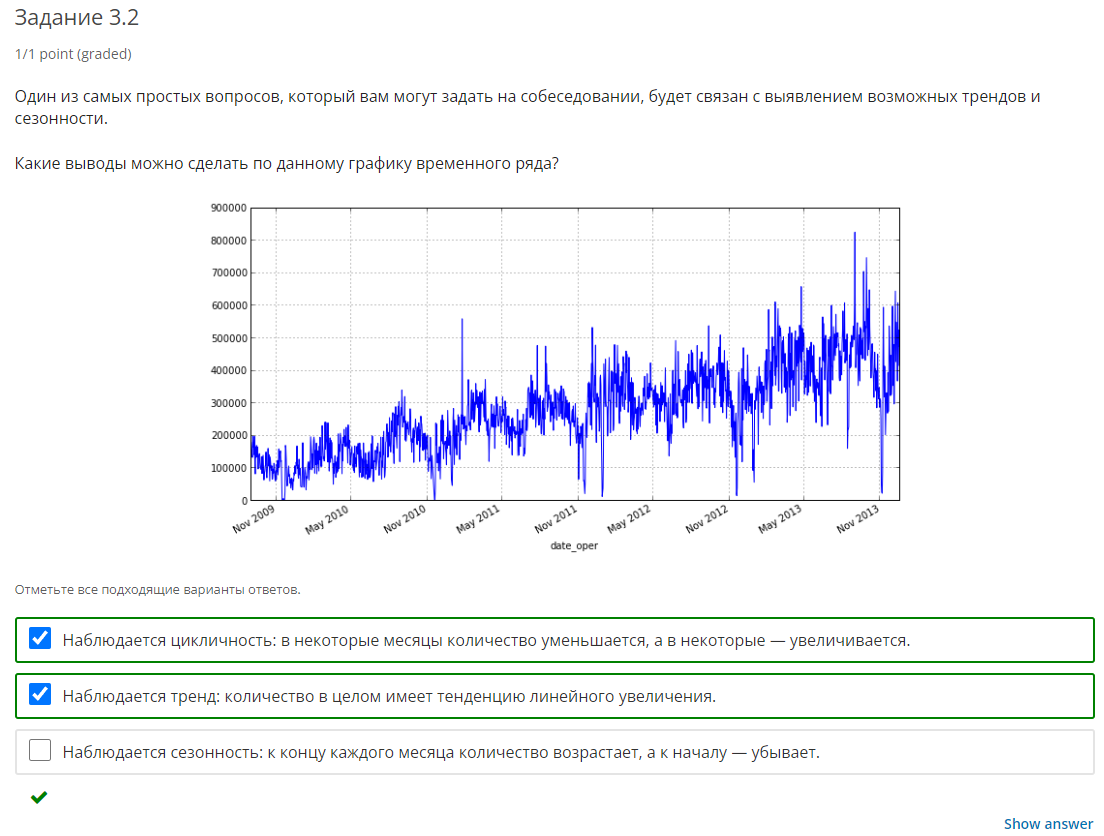